In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

In [2]:
EARLY_STOP_NUMBER = 3

In [3]:
def find_start_first_non_decreased_sequent(series_data, window):
    rolled_data = series_data.rolling(window).apply(lambda x: all(i < j for i, j in zip(x, x[1:]))).fillna(0.0)
    increased_values_iter = [idx for idx, x in enumerate(rolled_data) if x > 0.0]
    if len(increased_values_iter):
        return increased_values_iter[0] - 1
    else:
        return None

In [8]:
def plot_perplexity_and_loss(df, first, second):
    fig, ax = plt.subplots(nrows=1)

    fig.set_size_inches(15,8)

    df.index += 1

    df.train_perplexity.plot(ax=ax, label="Train Perplexity")
    df.test_perplexity.plot(ax=ax, label="Test Perplexity", color="g")
    ax.set_title("Train and Test Perplexity")
    ax_0_lim = ax.get_ylim()
    # ax[0].vlines(x=first, ymin=ax_0_lim[0], ymax=ax_0_lim[1], colors="r")
    # ax[0].vlines(x=second, ymin=ax_0_lim[0], ymax=ax_0_lim[1], colors="r")
    ax.legend()

    # df.train_mean_loss.plot(ax=ax[1], label="Train Mean Loss")
    # df.test_mean_loss.plot(ax=ax[1], label="Test Mean Loss", color="g")
    # ax[1].set_title("Train and Test Mean Loss")
    # ax_1_lim = ax[1].get_ylim()
    # ax[1].vlines(x=first, ymin=ax_1_lim[0], ymax=ax_1_lim[1], colors="r")
    # ax[1].vlines(x=second, ymin=ax_1_lim[0], ymax=ax_1_lim[1], colors="r")
    # ax[1].legend()

    plt.show()

In [9]:
df = pd.read_csv("../../../../data/ml/med_distilbert_base_russian_cased/metric_history.csv", index_col=0)
df.head()

,train_perplexity,train_mean_loss,test_perplexity,test_mean_loss
0,978.173321,6.885687,357.519352,5.879189
1,425.918230,6.054247,217.506318,5.382228
2,207.601802,5.335622,204.873058,5.322391
3,180.846054,5.197646,140.005255,4.941680
4,169.810585,5.134684,175.877695,5.169789


In [10]:
find_start_first_non_decreased_sequent(df.test_perplexity, EARLY_STOP_NUMBER)

10

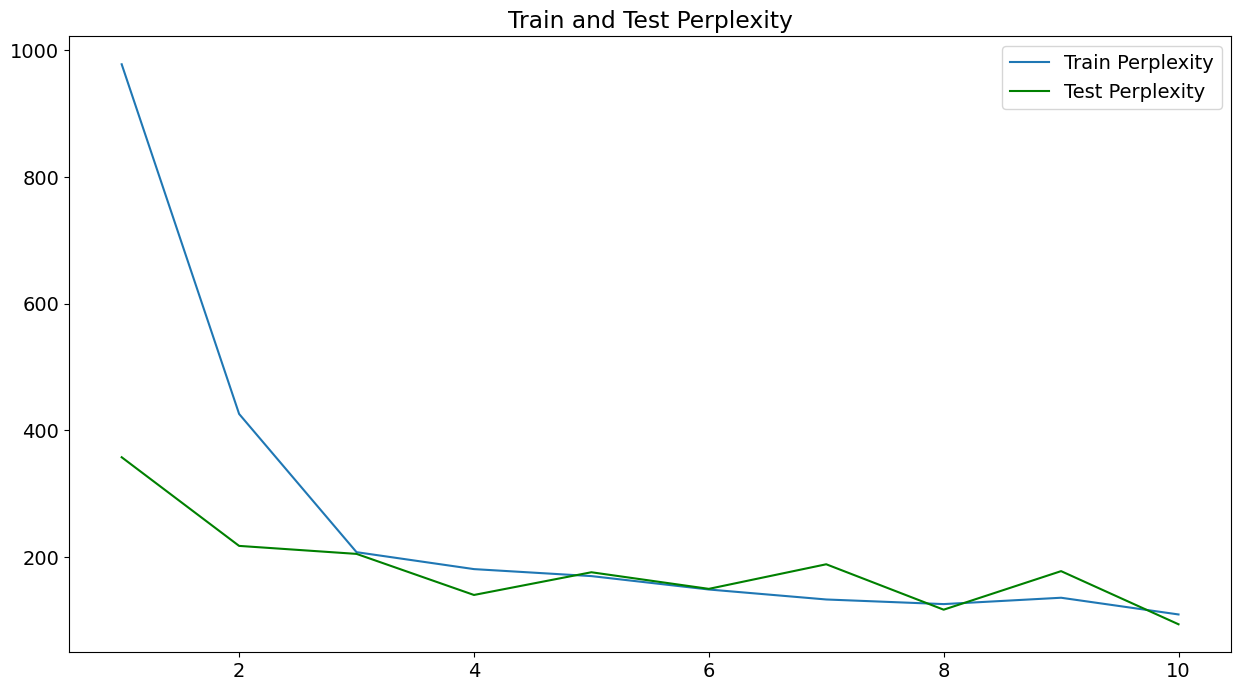

In [11]:
plot_perplexity_and_loss(df[:10],5,10)

# Decision
Let's fine tune the model in 10 epoch, so I believe it's enough for finetuning and for keep the model non-overfitted